## Import Library

In [ ]:
# Import Libraries
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Splitting
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

# Model
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier

# Evaluation Metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


## Load Dataset

In [ ]:
file_path = '/content/regenerated_landslide_risk_dataset.csv'

df = pd.read_csv(file_path, delimiter=',')

## Cek Struktur Data

In [ ]:
df.head(10)

,Temperature (°C),Humidity (%),Precipitation (mm),Soil Moisture (%),Elevation (m),Landslide Risk Prediction
0,17,68,176,64,120,Low
1,26,33,65,24,672,Low
2,16,81,56,52,36,Low
3,25,53,136,70,583,Low
4,34,77,23,37,130,Low
5,15,84,70,58,462,Low
6,35,89,208,41,898,Low
7,35,41,147,51,256,Low
8,28,53,86,30,144,Low
9,21,62,41,29,807,Low


In [ ]:
df.shape

(5000, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Temperature (°C)           5000 non-null   int64 
 1   Humidity (%)               5000 non-null   int64 
 2   Precipitation (mm)         5000 non-null   int64 
 3   Soil Moisture (%)          5000 non-null   int64 
 4   Elevation (m)              5000 non-null   int64 
 5   Landslide Risk Prediction  5000 non-null   object
dtypes: int64(5), object(1)
memory usage: 234.5+ KB


## Statistik Deskriptif

In [ ]:
df.describe()

,Temperature (°C),Humidity (%),Precipitation (mm),Soil Moisture (%),Elevation (m)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,24.815800,62.614000,123.126400,54.915800,503.015800
std,6.052867,19.108533,72.144734,20.345788,288.700745
min,15.000000,30.000000,0.000000,20.000000,0.000000
25%,20.000000,46.000000,61.000000,37.000000,253.000000
50%,25.000000,63.000000,121.000000,55.000000,505.000000
75%,30.000000,79.000000,186.000000,72.250000,757.000000
max,35.000000,95.000000,250.000000,90.000000,1000.000000


## Cek Missing Value

In [ ]:
df.isnull().sum()

,0
Temperature (°C),0
Humidity (%),0
Precipitation (mm),0
Soil Moisture (%),0
Elevation (m),0
Landslide Risk Prediction,0


## Cek NaN

In [ ]:
df.isna().sum()

,0
Temperature (°C),0
Humidity (%),0
Precipitation (mm),0
Soil Moisture (%),0
Elevation (m),0
Landslide Risk Prediction,0


## Cek Duplikasi

In [ ]:
df.duplicated().sum()

np.int64(0)

## Label Encoding

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df["Landslide Risk Prediction"] = label_encoder.fit_transform(df["Landslide Risk Prediction"])

## Distribusi data

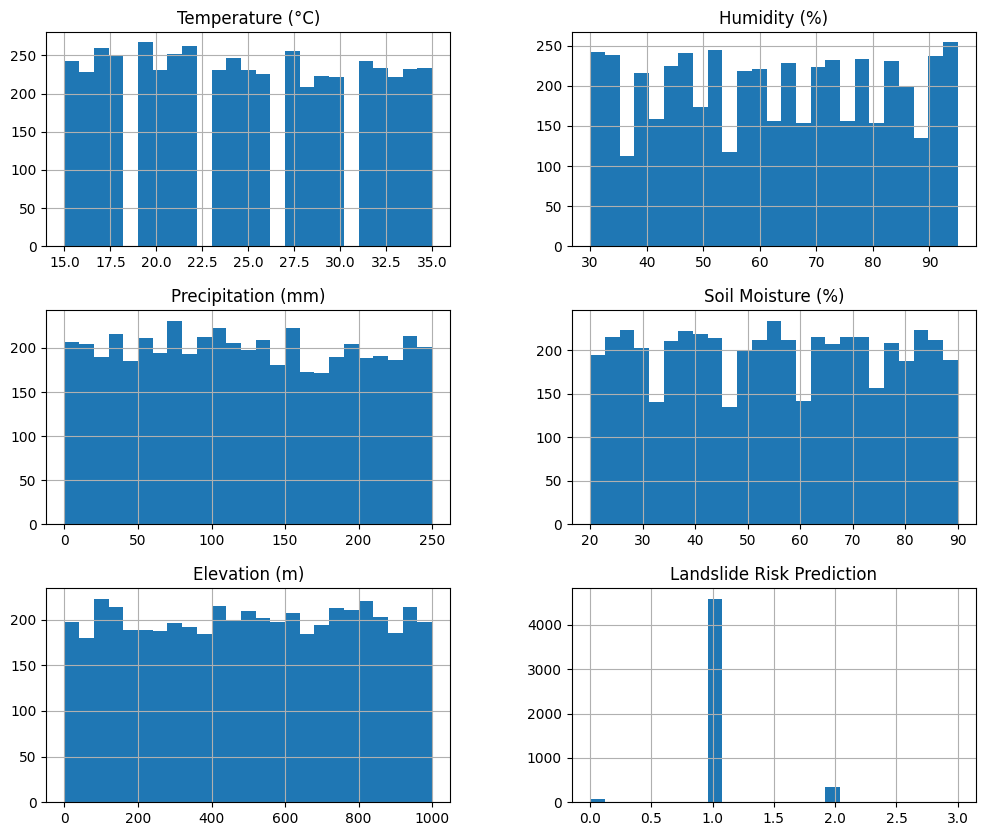

In [ ]:
df.hist(figsize=(12, 10), bins=25)
plt.show()

In [ ]:
df["Landslide Risk Prediction"].value_counts()

,count
Landslide Risk Prediction,
1,4591
2,334
0,63
3,12


## Korelasi Fitur

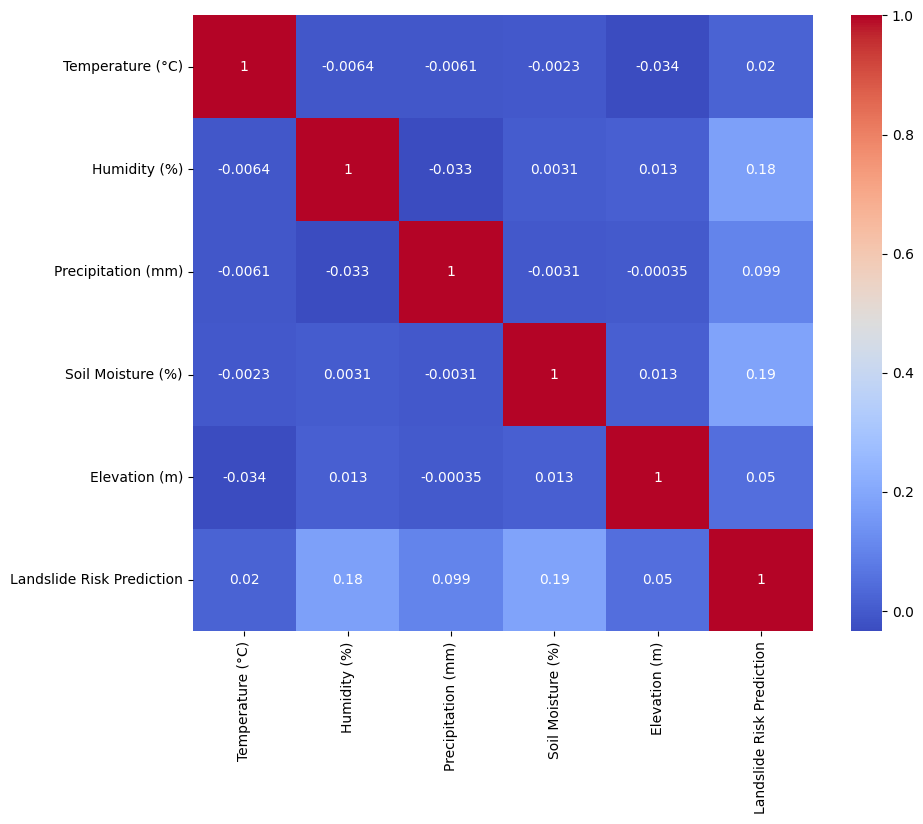

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

## X, Y defined

In [ ]:
df_clean = df.copy()

In [ ]:
X = df_clean.drop("Landslide Risk Prediction", axis=1)
y = df_clean["Landslide Risk Prediction"]

## SMOTE

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
X_res, y_res = sm.fit_resample(X, y)


In [ ]:
y_res.value_counts()

,count
Landslide Risk Prediction,
1,4591
2,4591
0,4591
3,4591


## Splitting Dataset


## TEST 75 TRAIN 15 PRED 10

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X_res, y_res,
    test_size=0.25,   # sisa 25%
    random_state=42,
    stratify=y_res
)

In [ ]:
X_test, X_pred, y_test, y_pred_true = train_test_split(
    X_temp, y_temp,
    test_size=0.4,    # 40% dari 25% = 10% total
    random_state=42,
    stratify=y_temp
)


In [ ]:
len(X_train)

13773

In [ ]:
len(X_test)

2754

In [ ]:
len(X_pred)

1837

## Normalisasi Fitur

In [ ]:
sc = StandardScaler()
sc.fit(X)
X_train_scaled = sc.transform(X_train)
X_test_scaled = sc.transform(X_test)
X_pred_scaled = sc.transform(X_pred)

In [ ]:
df_pred = pd.DataFrame(X_pred, columns=X_pred.columns)
df_pred["y_pred"] = y_pred_true

df_pred.to_csv("data_prediksi.csv", index=False)

## XGBost

In [ ]:
model = XGBClassifier(
    eval_metric='mlogloss',
    random_state=42,
)

In [ ]:
param_grid = {
    'n_estimators': [300,400],              # jumlah trees
    'max_depth': [10],                  # kedalaman tree
    'learning_rate': [0.01],            # kecepatan belajar
    'subsample': [1],                   # berapa banyak sample per tree
    'colsample_bytree': [0.8],          # berapa banyak fitur per tree
    'gamma': [0]                        # regularization
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='f1_macro',     # imbalance
    cv=5,                   # 5-fold cross-validation
    n_jobs=-1,              # gunakan semua CPU
    verbose=2
)

In [ ]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     feature_weights=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constrain...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0],
                         'learning_rate': [0.01], 'max_depth': [10],
                         'n_estimators': [300, 400], 'subsample': [1]},
             scoring='f1_macro', verbose=2)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'subsample': 1}
0.9988382505274453


In [ ]:
best_model = XGBClassifier(
    **grid_search.best_params_,
    eval_metric='mlogloss',
    random_state=42
)

In [ ]:
best_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=0,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = best_model.predict(X_test_scaled)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9996368917937546

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       689
           1       1.00      1.00      1.00       688
           2       1.00      1.00      1.00       689
           3       1.00      1.00      1.00       688

    accuracy                           1.00      2754
   macro avg       1.00      1.00      1.00      2754
weighted avg       1.00      1.00      1.00      2754


Confusion Matrix:
 [[689   0   0   0]
 [  0 688   0   0]
 [  1   0 688   0]
 [  0   0   0 688]]


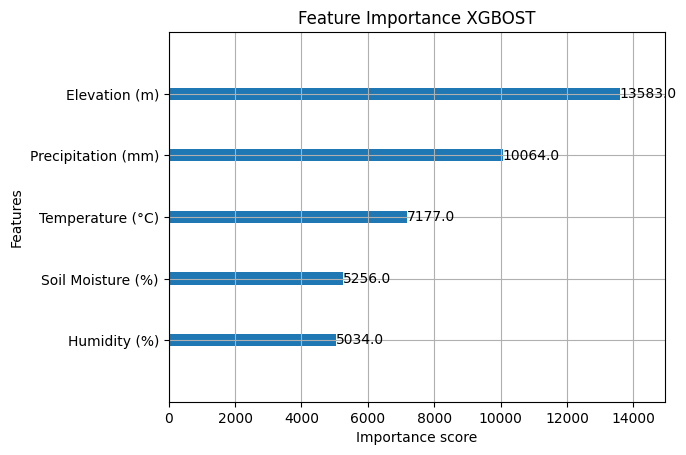

In [ ]:
best_model.get_booster().feature_names = X_train.columns.tolist()
xgb.plot_importance(best_model)
plt.title('Feature Importance XGBOST')
plt.show()

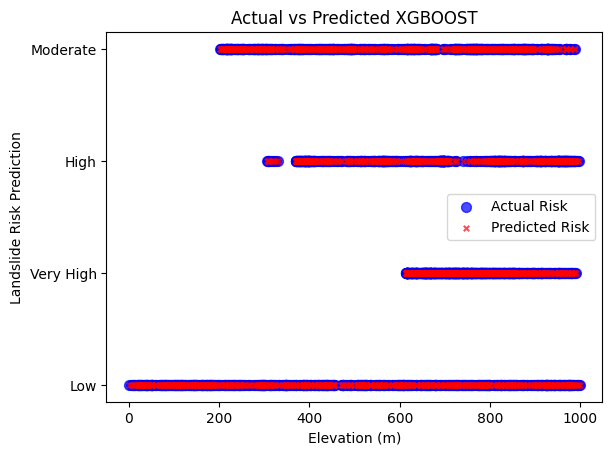

In [ ]:
plt.scatter(x=X_test["Elevation (m)"], y=label_encoder.inverse_transform(y_test),
           alpha=0.7, label='Actual Risk', color='blue', s=50)
plt.scatter(x=X_test["Elevation (m)"], y=label_encoder.inverse_transform(y_pred),
           alpha=0.7, label='Predicted Risk', color='red', s=15, marker='x')
plt.title('Actual vs Predicted XGBOOST')
plt.xlabel('Elevation (m)')
plt.ylabel('Landslide Risk Prediction')
plt.legend()
plt.show()

## Random Forest

In [ ]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [ ]:
param_grid_rf = {
    'n_estimators': [200,300],               # jumlah pohon
    'max_depth': [20],               # kedalaman pohon
    'min_samples_split': [5],     # min sample utk split
    'min_samples_leaf': [2],          # min sample per daun
    'max_features': ['sqrt'],    # jumlah fitur yg diuji tiap node
    'bootstrap': [False]           # sampling method
}
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid_rf,
    scoring='f1_macro',   # imbalance
    cv=5,
    n_jobs=-1,
    verbose=2
)


In [ ]:
grid_search_rf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [20],
                         'max_features': ['sqrt'], 'min_samples_leaf': [2],
                         'min_samples_split': [5], 'n_estimators': [200, 300]},
             scoring='f1_macro', verbose=2)

In [ ]:
print("Best Params:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)

Best Params: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Best Score: 0.9989108771078014


In [ ]:
best_rf = grid_search_rf.best_estimator_
best_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(bootstrap=False, class_weight='balanced', max_depth=20,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [ ]:
y_pred_rf = best_rf.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.9996368917937546
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       689
           1       1.00      1.00      1.00       688
           2       1.00      1.00      1.00       689
           3       1.00      1.00      1.00       688

    accuracy                           1.00      2754
   macro avg       1.00      1.00      1.00      2754
weighted avg       1.00      1.00      1.00      2754


Confusion Matrix:
 [[689   0   0   0]
 [  0 688   0   0]
 [  1   0 688   0]
 [  0   0   0 688]]


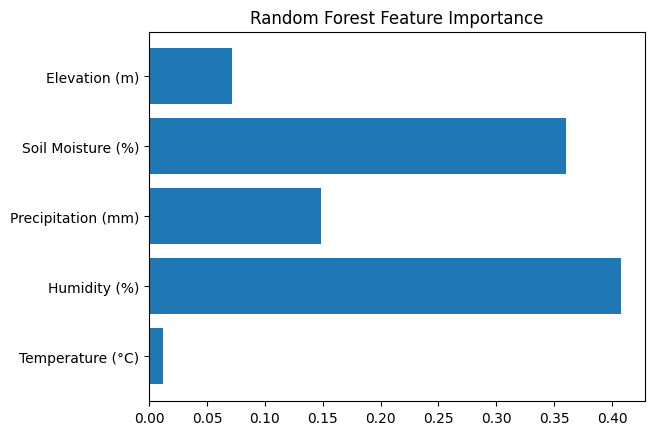

In [ ]:
plt.barh(X_train.columns, best_rf.feature_importances_)
plt.title("Random Forest Feature Importance")
plt.show()

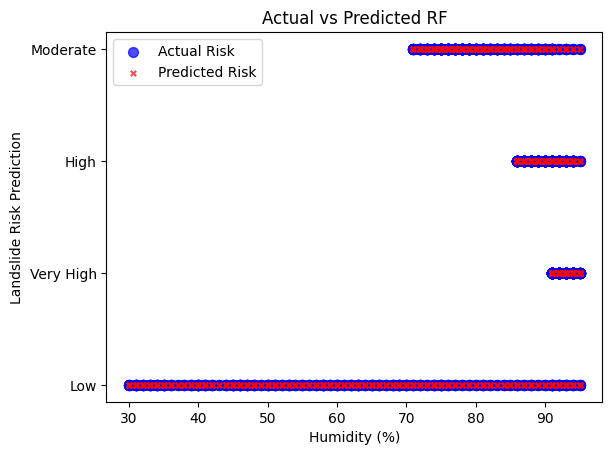

In [ ]:
plt.scatter(x=X_test["Humidity (%)"], y=label_encoder.inverse_transform(y_test),
           alpha=0.7, label='Actual Risk', color='blue', s=50)
plt.scatter(x=X_test["Humidity (%)"], y=label_encoder.inverse_transform(y_pred_rf),
           alpha=0.7, label='Predicted Risk', color='red', s=15, marker='x')
plt.title('Actual vs Predicted RF')
plt.xlabel('Humidity (%)')
plt.ylabel('Landslide Risk Prediction')
plt.legend()
plt.show()

## SAVE MODEL

In [ ]:
joblib.dump(sc, "scaler.pkl")


joblib.dump(best_model, "best_model_XGB.pkl")
joblib.dump(best_rf, "best_model_RF.pkl")

['best_model_RF.pkl']